# Dataset



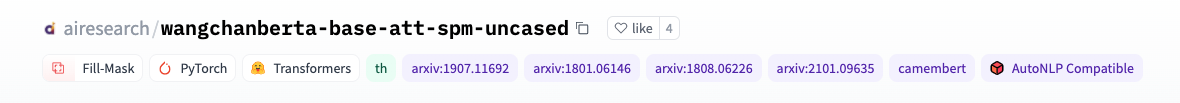

In [ ]:
! pip install -q datasets transformers[sentencepiece] simpletransformers

     |████████████████████████████████| 311 kB 5.2 MB/s 
     |████████████████████████████████| 3.5 MB 53.3 MB/s 
     |████████████████████████████████| 248 kB 52.8 MB/s 
     |████████████████████████████████| 1.1 MB 50.7 MB/s 
     |████████████████████████████████| 133 kB 67.4 MB/s 
     |████████████████████████████████| 67 kB 5.0 MB/s 
     |████████████████████████████████| 243 kB 60.8 MB/s 
     |████████████████████████████████| 1.2 MB 48.4 MB/s 
     |████████████████████████████████| 9.7 MB 46.2 MB/s 
     |████████████████████████████████| 6.8 MB 44.4 MB/s 
     |████████████████████████████████| 43 kB 2.1 MB/s 
     |████████████████████████████████| 1.7 MB 52.6 MB/s 
     |████████████████████████████████| 596 kB 58.7 MB/s 
     |████████████████████████████████| 895 kB 58.1 MB/s 
     |████████████████████████████████| 144 kB 58.3 MB/s 
     |████████████████████████████████| 180 kB 66.7 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
     |███████████████

In [ ]:
!gdown --id 1OnBwTIlA_NzQZaziRjuoMsFFR1zIwwMY

Downloading...
From: https://drive.google.com/uc?id=1OnBwTIlA_NzQZaziRjuoMsFFR1zIwwMY
To: /content/ne_test.txt
100% 789k/789k [00:00<00:00, 119MB/s]


In [ ]:
! wget https://github.com/kobkrit/datasets/raw/main/AIFORTHAI-LST20Corpus.tar.gz

--2022-02-15 15:35:04--  https://github.com/kobkrit/datasets/raw/main/AIFORTHAI-LST20Corpus.tar.gz
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/kobkrit/datasets/main/AIFORTHAI-LST20Corpus.tar.gz [following]
--2022-02-15 15:35:04--  https://raw.githubusercontent.com/kobkrit/datasets/main/AIFORTHAI-LST20Corpus.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13551362 (13M) [application/octet-stream]
Saving to: ‘AIFORTHAI-LST20Corpus.tar.gz’

AIFORTHAI-LST20Corp 100%[===================>]  12.92M  --.-KB/s    in 0.1s    

2022-02-15 15:35:05 (122 MB/s) - ‘AIFORTHAI-LST20Corpus.tar.gz’ save

In [ ]:
! tar -xvzf AIFORTHAI-LST20Corpus.tar.gz

In [ ]:
from datasets import load_dataset
lst20 = load_dataset("lst20", data_dir="/content/LST20_Corpus")

Downloading:   0%|          | 0.00/2.42k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.22k [00:00<?, ?B/s]

Using custom data configuration default-97621787f5b60e1b


0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

Dataset lst20 downloaded and prepared to /root/.cache/huggingface/datasets/lst20/default-97621787f5b60e1b/0.0.0/e1b2a921fb011578ab43ddbbf789f3c500d62cb2df8ae4ed4b60bae8e4c0d3ad. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
import pandas as pd
train_df = pd.DataFrame(lst20['train'])
validation_df = pd.DataFrame(lst20['validation'])
test_df = pd.DataFrame(lst20['test'])

In [ ]:
# See tags from https://github.com/huggingface/datasets/blob/master/datasets/lst20/lst20.py
_NER_TAGS = [
        "O",
        "B_BRN",
        "B_DES",
        "B_DTM",
        "B_LOC",
        "B_MEA",
        "B_NUM",
        "B_ORG",
        "B_PER",
        "B_TRM",
        "B_TTL",
        "I_BRN",
        "I_DES",
        "I_DTM",
        "I_LOC",
        "I_MEA",
        "I_NUM",
        "I_ORG",
        "I_PER",
        "I_TRM",
        "I_TTL",
        "E_BRN",
        "E_DES",
        "E_DTM",
        "E_LOC",
        "E_MEA",
        "E_NUM",
        "E_ORG",
        "E_PER",
        "E_TRM",
        "E_TTL",
    ]

In [ ]:
def convert_to_simple_transformer_format(df, field_name, tags):
  sentence_id = []
  words = []
  labels = []

  #Limit at 1000 rows for speed.
  for (idx, r) in df.iterrows():
    # print(idx)
    for (i, t) in enumerate(r['tokens']):
      # print(i,t)
      sentence_id.append(idx)
      words.append(t)
      labels.append(tags[r[field_name][i]])

  return pd.DataFrame(
      {"sentence_id": sentence_id, "words": words, "labels": labels}
  )


In [ ]:
train_ = convert_to_simple_transformer_format(train_df, "ner_tags", _NER_TAGS)

In [ ]:
validation_ = convert_to_simple_transformer_format(validation_df, "ner_tags", _NER_TAGS)

In [ ]:
validation_["sentence_id"]+=max(train_["sentence_id"])

In [ ]:
import pandas as pd
train_val_ =pd.concat([train_,validation_],ignore_index=True)

In [ ]:
test_ = convert_to_simple_transformer_format(test_df, "ner_tags", _NER_TAGS)


# Train

In [ ]:
import torch
import pandas as pd
from simpletransformers.ner import NERModel, NERArgs

# Configure the model
ner_args = NERArgs()
ner_args.train_batch_size = 64
ner_args.evaluate_during_training = True
ner_args.overwrite_output_dir = True
ner_args.num_train_epochs = 1

model = NERModel(
    "camembert", "airesearch/wangchanberta-base-att-spm-uncased", args=ner_args, use_cuda=torch.cuda.is_available(), labels=_NER_TAGS
)



Downloading:   0%|          | 0.00/546 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/404M [00:00<?, ?B/s]

Some weights of the model checkpoint at airesearch/wangchanberta-base-att-spm-uncased were not used when initializing CamembertForTokenClassification: ['lm_head.decoder.bias', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'lm_head.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing CamembertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing CamembertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of CamembertForTokenClassification were not initialized from the model checkpoint at airesearch/wangchanberta-base-att-spm-uncased and are newly initialized: ['classifier

Downloading:   0%|          | 0.00/282 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/883k [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/simpletransformers/ner/ner_model.py:379: UserWarning: use_multiprocessing automatically disabled as CamemBERT fails when using multiprocessing for feature conversion.
  "use_multiprocessing automatically disabled as CamemBERT"


In [ ]:
# Train the model
model.train_model(train_val_, eval_data=test_)

  0%|          | 0/68929 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use thePyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/1078 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


  0%|          | 0/5 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/657 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: B_LOC seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: B_ORG seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: B_DTM seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: E_DTM seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: I_DTM seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171:

(1078,
 defaultdict(list,
             {'eval_loss': [0.12534551068614527],
              'f1_score': [0.7587289349047251],
              'global_step': [1078],
              'precision': [0.7321570919912844],
              'recall': [0.7873021315503743],
              'train_loss': [0.0078677237033844]}))

# Load Model

In [ ]:
#load_model again

model = NERModel(
    "camembert", "outputs/best_model"
)

/usr/local/lib/python3.7/dist-packages/simpletransformers/ner/ner_model.py:379: UserWarning: use_multiprocessing automatically disabled as CamemBERT fails when using multiprocessing for feature conversion.
  "use_multiprocessing automatically disabled as CamemBERT"


In [ ]:
f=open('/content/ne_test.txt','r')
text = f.readlines()
input_text = []

for i in range(len(text)):
  if text[i] != "\n":
    input_text.append(text[i].replace(" ","_").replace(u"\xa0","_")) #\xa0 คือ space ใน utf8 
  else:
    input_text.append("_")

input_text = input_text[:len(input_text)-1] # ตัด \n ท้ายไฟล์ทิ้ง

# ระวังค้าง!!!!

In [ ]:
i=0
prediction=[]
input_len = 50 # feed เข้าทีละ 50

while i*input_len <=len(input_text):

  target_slice = input_text[ i*input_len : (i+1)*input_len ]
  input = " ".join(target_slice)
  pred, raw_outputs = model.predict([input])
  prediction+=[list(p.values())[0] for p in pred[0]]


  if len(pred[0])!=len(target_slice):
    prediction+= (["O"]*(len(target_slice)-len(pred[0]))) # ถ้า prediction ออกมาน้อยกว่า input มั่ว O เพิ่ม จนครบ
  i+=1


In [ ]:
#Rule Based 
import pandas as pd

for i in range(1,len(prediction)):
  if prediction[i][0]== "I" and prediction[i-1][0]=="B":
    prediction[i]="I" + prediction[i-1][1:]
  elif prediction[i][0]== "E" and prediction[i-1][0]=="I":
    prediction[i]="E" + prediction[i-1][1:]

tt=pd.Series(prediction).unique()
tt

array(['B_TTL', 'B_PER', 'I_PER', 'E_PER', 'O', 'B_DES', 'B_ORG', 'B_LOC',
       'B_MEA', 'E_MEA', 'B_DTM', 'I_DTM', 'E_DTM', 'I_DES', 'E_DES',
       'B_TRM', 'I_TRM', 'E_TRM', 'E_ORG', 'B_NUM', 'I_ORG', 'E_LOC',
       'I_MEA', 'I_LOC', 'I_NUM', 'E_NUM', 'B_BRN', 'I_TTL'], dtype=object)

In [ ]:
id = [i+1 for i in range(len(prediction))]
submission = pd.DataFrame({"Id":id,"Predicted":prediction})

In [ ]:
submission.to_csv("submission.csv",index=False)

In [ ]:
submission

In [ ]:
# Make predictions with the loaded model
# predictions, raw_outputs = test_ner.predict(["ประยุกธ์ เผย ลูกน้อง ไม่ เชื่อ พูด ตลก ได้ สามารถ แข่ง กับ โน๊ต อุดม เดี่ยว ไมโครโฟน เมื่อ วันที่ 26 กุมภาพันธ์ ที่ ตลาด หลักทรัพย์ แห่ง ประเทศไทย"])
# predictions